In [1]:
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.six import StringIO
from rdkit.Chem import Descriptors3D
from rdkit.Chem import Descriptors
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import SimilarityMaps

In [2]:
data = pd.read_csv('mps.csv', sep = ';')
data.head(5)

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID
0,CHEMBL3092035,NaN,0,412.49,0,4.89,28,COc1cc(ccc1Nc2ncc3cccc(c4ccccc4)c3n2)N5CCOCC5,IC50,'=',...,CHEMBL394,HCT-116,Homo sapiens,CELL-LINE,CHEMBL3091390,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2013,CHEMBL3308372
1,CHEMBL3092030,NaN,0,484.63,0,3.77,17,COc1cc(ccc1Nc2ncc3ccn(C4CCCCC4)c3n2)N5CCN(CC5)...,IC50,'=',...,CHEMBL394,HCT-116,Homo sapiens,CELL-LINE,CHEMBL3091390,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2013,CHEMBL3308372
2,CHEMBL3092038,NaN,0,490.59,0,3.53,31,COc1cc(ccc1Nc2ncc3cccc(c4cccnc4)c3n2)N5CCN(CC5...,IC50,'=',...,CHEMBL3983,Dual specificity protein kinase TTK,Homo sapiens,SINGLE PROTEIN,CHEMBL3091390,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2013,NaN
3,CHEMBL3092037,NaN,0,489.60,0,4.13,30,COc1cc(ccc1Nc2ncc3cccc(c4ccccc4)c3n2)N5CCN(CC5...,IC50,'=',...,CHEMBL3983,Dual specificity protein kinase TTK,Homo sapiens,SINGLE PROTEIN,CHEMBL3091390,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2013,NaN
4,CHEMBL3092033,NaN,0,479.57,0,2.65,20,COc1cc(ccc1Nc2ncc3ccn(c4cccnc4)c3n2)N5CCN(CC5)...,IC50,'>',...,CHEMBL3983,Dual specificity protein kinase TTK,Homo sapiens,SINGLE PROTEIN,CHEMBL3091390,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2013,NaN


In [3]:
data.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID'],
      dtype='object')

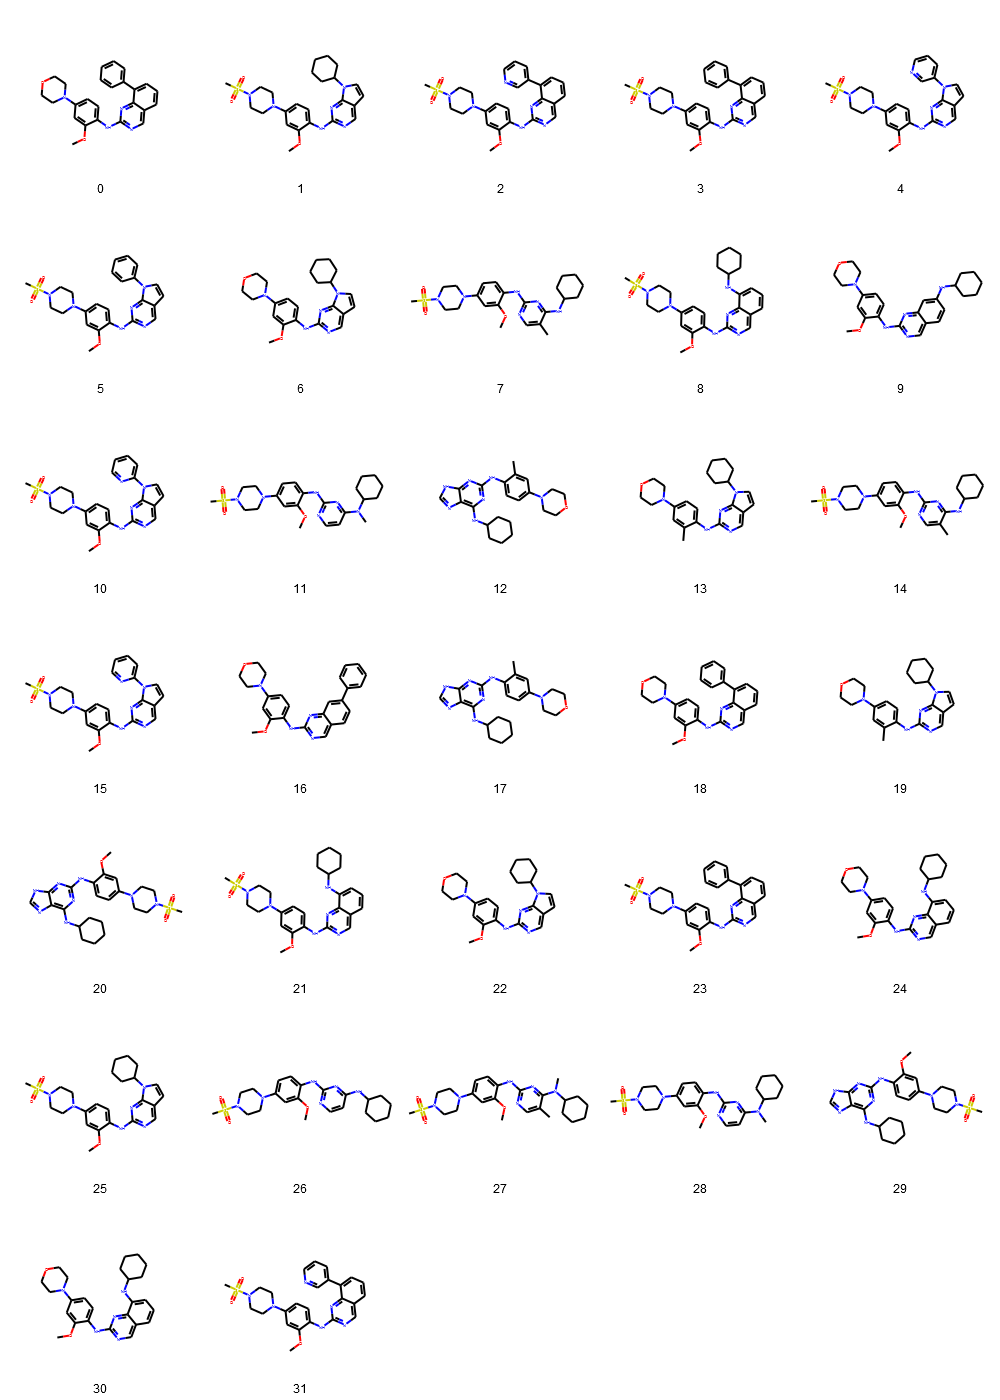

In [4]:
#smiles ID to convert to structure! 
mols = [Chem.MolFromSmiles(smi) for smi in data.Smiles]

Draw.MolsToGridImage(mols, molsPerRow = 5, legends = [str(i) for i in range(len(mols))])
                                                                            

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Data Validity Comment,Comment,Uo Units,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,Potential Duplicate,Assay ChEMBL ID,Assay Description,Assay Type,BAO Format ID,BAO Label,Assay Organism,Assay Tissue ChEMBL ID,Assay Tissue Name,Assay Cell Type,Assay Subcellular Fraction,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Molecule
0,CHEMBL3092035,NaN,0,412.49,0,4.89,28,COc1cc(ccc1Nc2ncc3cccc(c4ccccc4)c3n2)N5CCOCC5,IC50,'=',850,nM,6.07,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL3096273,Cytotoxicity against human HCT116 cells,F,BAO_0000219,cell-based format,Homo sapiens,NaN,NaN,HCT-116,NaN,CHEMBL394,HCT-116,Homo sapiens,CELL-LINE,CHEMBL3091390,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2013,CHEMBL3308372,
1,CHEMBL3092030,NaN,0,484.63,0,3.77,17,COc1cc(ccc1Nc2ncc3ccn(C4CCCCC4)c3n2)N5CCN(CC5)S(=O)(=O)C,IC50,'=',750,nM,6.12,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL3096273,Cytotoxicity against human HCT116 cells,F,BAO_0000219,cell-based format,Homo sapiens,NaN,NaN,HCT-116,NaN,CHEMBL394,HCT-116,Homo sapiens,CELL-LINE,CHEMBL3091390,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2013,CHEMBL3308372,
2,CHEMBL3092038,NaN,0,490.59,0,3.53,31,COc1cc(ccc1Nc2ncc3cccc(c4cccnc4)c3n2)N5CCN(CC5)S(=O)(=O)C,IC50,'=',8,nM,8.10,NaN,NaN,UO_0000065,16.50,0.32,4.57,8.05,False,CHEMBL3096274,Inhibition of full-length Mps1 kinase (unknown origin),B,BAO_0000357,single protein format,Homo sapiens,NaN,NaN,NaN,NaN,CHEMBL3983,Dual specificity protein kinase TTK,Homo sapiens,SINGLE PROTEIN,CHEMBL3091390,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2013,NaN,
3,CHEMBL3092037,NaN,0,489.60,0,4.13,30,COc1cc(ccc1Nc2ncc3cccc(c4ccccc4)c3n2)N5CCN(CC5)S(=O)(=O)C,IC50,'=',5,nM,8.30,NaN,NaN,UO_0000065,16.95,0.32,4.17,9.47,False,CHEMBL3096274,Inhibition of full-length Mps1 kinase (unknown origin),B,BAO_0000357,single protein format,Homo sapiens,NaN,NaN,NaN,NaN,CHEMBL3983,Dual specificity protein kinase TTK,Homo sapiens,SINGLE PROTEIN,CHEMBL3091390,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2013,NaN,
4,CHEMBL3092033,NaN,0,479.57,0,2.65,20,COc1cc(ccc1Nc2ncc3ccn(c4cccnc4)c3n2)N5CCN(CC5)S(=O)(=O)C,IC50,'>',100,nM,NaN,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL3096274,Inhibition of full-length Mps1 kinase (unknown origin),B,BAO_0000357,single protein format,Homo sapiens,NaN,NaN,NaN,NaN,CHEMBL3983,Dual specificity protein kinase TTK,Homo sapiens,SINGLE PROTEIN,CHEMBL3091390,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2013,NaN,

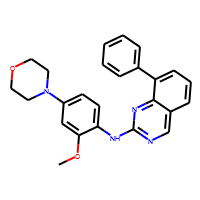
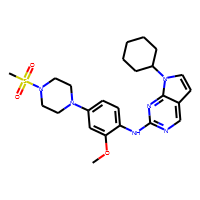
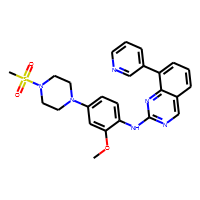
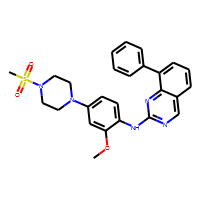
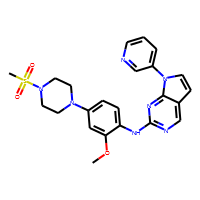

In [6]:
#lets add these structures to the dataset! we have ! 

from rdkit.Chem import PandasTools
PandasTools.AddMoleculeColumnToFrame(data,'Smiles','Molecule',includeFingerprints=True)
data.head(5)

In [7]:
#lets add filters
ChEMBL_data = pd.read_csv('EGFR_compounds.csv', index_col=0)
ChEMBL_data.head(5) #pIC50 can give us the binding affinity , max pIC50 is the best! 

,molecule_chembl_id,units,IC50,smiles,pIC50
0,CHEMBL63786,nM,0.003,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1,11.522879
1,CHEMBL53711,nM,0.006,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.221849
2,CHEMBL35820,nM,0.006,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC,11.221849
3,CHEMBL53753,nM,0.008,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.096910
4,CHEMBL66031,nM,0.008,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1,11.096910


In [8]:
#shape
ChEMBL_data.shape

(4771, 5)

In [21]:
def data_rule_of_five(data):
    
    smi = data['smiles']
    m = Chem.MolFromSmiles(smi)
    
    #lipinskis rule of 5
    MW = Descriptors.ExactMolWt(m)
    HBA = Descriptors.NumHAcceptors(m)
    HBD = Descriptors.NumHDonors(m)
    Logp = Descriptors.MolLogP(m)
    #PSA = Descriptors.TPSA(m)
    
    #conditions we have to specififyy! 
    
    conditions = [MW < 500, HBA <= 10, HBD <=5, Logp <=5]
    
    #return it as data and add it to the DATSET !
    return pd.Series([MW, HBA, HBD, Logp,'yes']) if conditions.count(True) >= 3 else pd.Series([MW, HBA, HBD, Logp,'no'])

In [24]:
rule5_prop_df = ChEMBL_data.apply(data_rule_of_five, axis=1)

# Name condition columns
rule5_prop_df.columns= ['MW', 'HBA', 'HBD', 'Logp','rule_of_five_conform']
rule5_prop_df.head(10)

,MW,HBA,HBD,Logp,rule_of_five_conform
0,349.021459,3,1,5.28910,yes
1,343.043258,5,1,3.59690,yes
2,387.058239,5,1,4.93330,yes
3,329.027607,5,2,3.57260,yes
4,339.011957,4,2,4.01220,yes
5,353.027607,5,1,4.02260,yes
6,359.026939,5,1,4.15310,yes
7,353.027607,5,1,4.02260,yes
8,477.136781,6,3,4.75878,yes
9,376.029395,4,2,4.94380,yes


In [25]:
#lets add these new predicted datas to our OLD DATASET !
ChEMBL_data = ChEMBL_data.join(rule5_prop_df)
ChEMBL_data.head(5)


,molecule_chembl_id,units,IC50,smiles,pIC50,MW,HBA,HBD,Logp,rule_of_five_conform
0,CHEMBL63786,nM,0.003,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1,11.522879,349.021459,3,1,5.2891,yes
1,CHEMBL53711,nM,0.006,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.221849,343.043258,5,1,3.5969,yes
2,CHEMBL35820,nM,0.006,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC,11.221849,387.058239,5,1,4.9333,yes
3,CHEMBL53753,nM,0.008,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.096910,329.027607,5,2,3.5726,yes
4,CHEMBL66031,nM,0.008,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1,11.096910,339.011957,4,2,4.0122,yes


In [27]:
#delete empty rows -- > rule of 5
filtered_data = ChEMBL_data[ChEMBL_data['rule_of_five_conform'] == 'yes']

# Info about data
print('# of compounds in unfiltered data set:', len(ChEMBL_data))
print('# of compounds in filtered data set:', len(filtered_data))
print("# of compounds not compliant with Lipinski's rule of five:", (len(ChEMBL_data)-len(filtered_data)))

# of compounds in unfiltered data set: 4771
# of compounds in filtered data set: 4009
# of compounds not compliant with Lipinski's rule of five: 762


In [29]:
#save filtered data ! 
filtered_data.to_csv('./data/EGFR_compounds_lipinski.csv', sep=';') 
filtered_data.head(10)

,molecule_chembl_id,units,IC50,smiles,pIC50,MW,HBA,HBD,Logp,rule_of_five_conform
0,CHEMBL63786,nM,0.003,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1,11.522879,349.021459,3,1,5.28910,yes
1,CHEMBL53711,nM,0.006,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.221849,343.043258,5,1,3.59690,yes
2,CHEMBL35820,nM,0.006,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC,11.221849,387.058239,5,1,4.93330,yes
3,CHEMBL53753,nM,0.008,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.096910,329.027607,5,2,3.57260,yes
4,CHEMBL66031,nM,0.008,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1,11.096910,339.011957,4,2,4.01220,yes
5,CHEMBL176582,nM,0.010,Cn1cnc2cc3ncnc(Nc4cccc(Br)c4)c3cc12,11.000000,353.027607,5,1,4.02260,yes
6,CHEMBL29197,nM,0.025,COc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OC,10.602060,359.026939,5,1,4.15310,yes
7,CHEMBL174426,nM,0.025,Cn1cnc2cc3c(Nc4cccc(Br)c4)ncnc3cc12,10.602060,353.027607,5,1,4.02260,yes
8,CHEMBL1243316,nM,0.030,CCOc1cc2ncc(C#N)c(Nc3ccc(F)c(Cl)c3)c2cc1NC(=O)\C=C\CNCC#C,10.522879,477.136781,6,3,4.75878,yes
9,CHEMBL3613702,nM,0.037,Fc1cc(Nc2ncnc3ccc(NC(=O)C=C)cc23)cc(Cl)c1Cl,10.431798,376.029395,4,2,4.94380,yes
